In [18]:
"""
jupyter-nbconvert tabulate.ipynb --to python 
ipython tabulate.py -- --base_dir ~/plume/plumezoo/latest/fly/memory/

ipython tabulate.py -- --base_dir ~/plume/plumezoo/
ipython tabulate.py -- --base_dir ~/plume/plume2/ppo/trained_models/
"""

'\njupyter-nbconvert tabulate.ipynb --to python \nipython tabulate.py -- --base_dir ~/plume/plumezoo/latest/fly/memory/\n\nipython tabulate.py -- --base_dir ~/plume/plumezoo/\nipython tabulate.py -- --base_dir ~/plume/plume2/ppo/trained_models/\n'

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import glob 
from pathlib import Path
import tqdm
import os
import argparse

In [20]:
import sys
batchmode = False
if 'ipykernel_launcher' in sys.argv[0]:
    print("Interactive mode")
    
    # BASE_DIR="/src/smartFlies/reproduce/ExptMemory20231001"
    # BASE_DIR="/src/TrainigCurriculum/data/published_results/reproduce/ExptMemory20230824/"
    BASE_DIR="/src/TrainigCurriculum/data/published_results/figshare_16879539/memory/"

    
else:
    batchmode = True
    print("Batch/CLI mode")
    import argparse
    
    parser = argparse.ArgumentParser(description='')
    parser.add_argument('--base_dir', default='')
    args = parser.parse_args()
    BASE_DIR=args.base_dir

Interactive mode


In [21]:
print(BASE_DIR)
import glob
# fnames = Path(BASE_DIR).rglob('*VRNN*/*_summary.csv')
# fnames = !find {BASE_DIR} -name "*VRNN*/*_summary.csv"
fnames = !find {BASE_DIR} -name "*_summary.csv"
files = glob.glob(f"{BASE_DIR}/**/*_summary.csv", recursive=True)
# fnames

/src/TrainigCurriculum/data/published_results/figshare_16879539/memory/


In [22]:
len(files)

280

In [23]:
counts_df = []
for fname in tqdm.tqdm(fnames):
    s = pd.read_csv(fname) 
    dataset = str(fname).split('/')[-1].replace('_summary.csv','')
    row = {
        'dataset': dataset,
        'HOME': sum(s['reason'] == 'HOME'),
        'OOB': sum(s['reason'] == 'OOB'),
        'OOT': sum(s['reason'] == 'OOT'),
        'total': len(s['reason']),
        'seed': str(fname).split('seed')[-1].split('/')[0],
        'model_dir': str(fname).replace(f'{dataset}_summary.csv','').replace(os.path.expanduser(BASE_DIR), ''),
        'code': str(fname).split('code')[-1].split('_')[0],
        'fname': str(fname)
    }
    counts_df.append(row)
    
counts_df = pd.DataFrame(counts_df)

100%|██████████| 280/280 [00:00<00:00, 416.04it/s]


In [24]:
eligible_datasets = [
        'constantx5b5', 
#         'switch15x5b5', 
#         'switch30x5b5', 
        'switch45x5b5', 
        'noisy3x5b5', 
#         'noisy6x5b5',
        'constantx5b5_0.8',
        'constantx5b5_0.6',
        'constantx5b5_0.4', 
        'constantx5b5_0.2',
]

In [25]:
print(counts_df.shape)
# counts_df = counts_df.query("total == 240 and dataset in @eligible_datasets")
counts_df = counts_df.query("dataset in @eligible_datasets")
print(counts_df.shape)

(280, 9)
(280, 9)


In [9]:
counts_df['dataset'].unique()

array(['constantx5b5', 'constantx5b5_0.4', 'switch45x5b5',
       'constantx5b5_0.8', 'noisy3x5b5', 'constantx5b5_0.2',
       'constantx5b5_0.6'], dtype=object)

In [26]:
counts_df

,dataset,HOME,OOB,OOT,total,seed,model_dir,code,fname
0,constantx5b5,2,165,73,240,26323e9,plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....,MLPs12,/src/TrainigCurriculum/data/published_results/...
1,constantx5b5_0.4,2,150,88,240,26323e9,plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....,MLPs12,/src/TrainigCurriculum/data/published_results/...
2,switch45x5b5,30,95,115,240,26323e9,plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....,MLPs12,/src/TrainigCurriculum/data/published_results/...
3,constantx5b5_0.8,1,170,69,240,26323e9,plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....,MLPs12,/src/TrainigCurriculum/data/published_results/...
4,noisy3x5b5,12,142,86,240,26323e9,plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....,MLPs12,/src/TrainigCurriculum/data/published_results/...
...,...,...,...,...,...,...,...,...,...
275,switch45x5b5,55,138,47,240,3696dd,plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....,MLPs12,/src/TrainigCurriculum/data/published_results/...
276,constantx5b5_0.8,57,1,182,240,3696dd,plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....,MLPs12,/src/TrainigCurriculum/data/published_results/...
277,noisy3x5b5,46,53,141,240,3696dd,plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....,MLPs12,/src/TrainigCurriculum/data/published_results/...
278,constantx5b5_0.2,29,10,201,240,3696dd,plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....,MLPs12,/src/TrainigCurriculum/data/published_results/...


In [31]:
# Pivot and total
pivot_df = counts_df.pivot(index=['model_dir', 'seed'], columns='dataset', values='HOME').reset_index()
# pivot_df['total'] = pivot_df.sum(axis=1, skipna=True)
pivot_df['total'] = pivot_df[['constantx5b5', 'noisy3x5b5', 'switch45x5b5',]].sum(axis=1, skipna=True)
# pivot_df['total'] = pivot_df['constantx5b5']/3 + pivot_df['noisy3x5b5'] + pivot_df['switch45x5b5']

In [32]:
pivot_df

dataset,model_dir,seed,constantx5b5,constantx5b5_0.2,constantx5b5_0.4,constantx5b5_0.6,constantx5b5_0.8,noisy3x5b5,switch45x5b5,total
0,plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...,2760377,143,51,102,146,134,67,120,330
1,plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...,3199993,152,8,158,150,152,103,53,308
2,plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...,3307e9,111,56,80,95,107,56,133,300
3,plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...,541058,143,141,87,149,130,22,121,286
4,plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...,9781ba,126,48,115,111,120,69,131,326
5,plume_20210602_GRU_constantx5b5noisy3x5b5_step...,1002237,182,3,11,17,144,4,124,310
6,plume_20210602_GRU_constantx5b5noisy3x5b5_step...,2398371,125,223,156,131,125,64,89,278
7,plume_20210602_GRU_constantx5b5noisy3x5b5_step...,876de,145,156,151,162,172,96,73,314
8,plume_20210602_MLP_s02_noisy3x5b5_stepoob_bx1....,16256b5,2,1,3,0,4,4,2,8
9,plume_20210602_MLP_s02_noisy3x5b5_stepoob_bx1....,7394aa,55,102,36,43,51,11,34,100


In [27]:
counts_df.columns

Index(['dataset', 'HOME', 'OOB', 'OOT', 'total', 'seed', 'model_dir', 'code',
       'fname'],
      dtype='object')

In [17]:
col_order = [
        'total',
        'constantx5b5', 
        'switch45x5b5', 
        'noisy3x5b5', 
#         'noisy6x5b5',
#         'switch30x5b5', 
#         'switch15x5b5', 
        'constantx5b5_0.8',
        'constantx5b5_0.6',
        'constantx5b5_0.4', 
        'constantx5b5_0.2',
        # 'code',
        'model_dir',
]
pivot_df = pivot_df[col_order]
pivot_df = pivot_df.sort_values(by='total', ascending=False)
pivot_df

dataset,total,constantx5b5,switch45x5b5,noisy3x5b5,constantx5b5_0.8,constantx5b5_0.6,constantx5b5_0.4,constantx5b5_0.2,model_dir
9,340,161,143,36,161,167,168,167,plume_20230825_VRNN_constantx5b5noisy3x5b5_ste...
4,279,148,121,10,136,145,166,149,plume_20230824_VRNN_constantx5b5noisy3x5b5_ste...
5,244,151,82,11,164,161,158,62,plume_20230824_VRNN_constantx5b5noisy3x5b5_ste...
13,217,117,87,13,150,124,3,11,plume_20230825_VRNN_constantx5b5noisy3x5b5_ste...
12,158,79,47,32,61,46,26,0,plume_20230825_VRNN_constantx5b5noisy3x5b5_ste...
3,146,113,22,11,100,128,52,68,plume_20230824_VRNN_constantx5b5noisy3x5b5_ste...
1,108,108,0,0,142,112,118,50,plume_20230824_VRNN_constantx5b5noisy3x5b5_ste...
8,106,96,9,1,99,142,1,3,plume_20230825_VRNN_constantx5b5noisy3x5b5_ste...
6,72,3,40,29,2,10,1,3,plume_20230824_VRNN_constantx5b5noisy3x5b5_ste...
7,62,60,0,2,70,108,19,14,plume_20230825_VRNN_constantx5b5noisy3x5b5_ste...


In [21]:
 pivot_df.model_dir[0]

'/plume_20230824_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed15803e0/'

In [22]:
for dir in pivot_df.model_dir[pivot_df.total >=200]:
    full_dir = '/'.join([BASE_DIR, dir[:-1]])
    cmd = f"cp -r {full_dir} '/src/smartFlies/data/published_results/reproduce/best_agents'"
    print(cmd)
    os.system(cmd)


cp -r /src/smartFlies/data/published_results/reproduce/ExptMemory20230824//plume_20230825_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed19328c6 '/src/smartFlies/reproduce/best_agents'
cp -r /src/smartFlies/data/published_results/reproduce/ExptMemory20230824//plume_20230824_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed2708890 '/src/smartFlies/reproduce/best_agents'
cp -r /src/smartFlies/data/published_results/reproduce/ExptMemory20230824//plume_20230824_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed2778045 '/src/smartFlies/reproduce/best_agents'
cp -r /src/smartFlies/data/published_results/reproduce/ExptMemory20230824//plume_20230825_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed26879ab '/src/smartFlies

In [11]:
pivot_df.to_csv(f'{BASE_DIR}/tabulated.tsv', sep='\t', index=False)
pivot_df.to_csv(f'{BASE_DIR}/tabulated.csv', index=False)

In [12]:
# import seaborn as sns
# sns.pairplot(pivot_df)

In [13]:
# Before filtering
pivot_df.groupby('code')['total'].count()

code
GRU       14
MLPs02    14
MLPs04    14
MLPs06    14
MLPs08    14
MLPs10    14
MLPs12    14
VRNN      14
Name: total, dtype: int64

In [14]:
# Filter for quality
# pivot_df.query("constantx5b5>0 and switch45x5b5>0 and noisy3x5b5>0 ").groupby('code').head(5)
# nonzeros = pivot_df.query("constantx5b5>10 and switch45x5b5>10 and noisy3x5b5>10 ")
# nonzeros = pivot_df.query("constantx5b5>0 and switch45x5b5>0 ") # for MLP_s02 and MLP_s04
# nonzeros = pivot_df.query("constantx5b5>0") # for MLP_s02 and MLP_s04

selected = [
    pivot_df.query("constantx5b5>10 and switch45x5b5>10 and noisy3x5b5>10 and code in ['VRNN', 'GRU'] "),
    pivot_df.query("constantx5b5>0 and switch45x5b5>0 and noisy3x5b5>=0 and code not in ['VRNN', 'GRU'] "),    
]

selected = pd.concat(selected).sort_values(by='total', ascending=False).groupby('code').head(5)
selected.groupby('code')['total'].count()



code
GRU       5
MLPs02    5
MLPs04    5
MLPs06    5
MLPs08    5
MLPs10    5
MLPs12    5
VRNN      5
Name: total, dtype: int64

In [15]:
# Sort to select top
# selected = nonzeros.sort_values(by='total', ascending=False).groupby('code').head(5) # .reset_index(drop=True)
# selected.groupby('code')['total'].count()

In [16]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
selected['model_dir'].to_csv(f'{BASE_DIR}/selected.csv', index=False, header=False)
selected['model_dir']

9      plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...
13     plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...
55     plume_20210603_GRU_constantx5b5noisy3x5b5_step...
14     plume_20210602_GRU_constantx5b5noisy3x5b5_step...
20     plume_20210602_GRU_constantx5b5noisy3x5b5_step...
6      plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...
12     plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...
51     plume_20210603_GRU_constantx5b5noisy3x5b5_step...
7      plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...
17     plume_20210602_GRU_constantx5b5noisy3x5b5_step...
83     plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....
38     plume_20210602_MLP_s08_noisy3x5b5_stepoob_bx1....
25     plume_20210602_MLP_s02_noisy3x5b5_stepoob_bx1....
80     plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....
86     plume_20210604_MLP_s02_noisy3x5b5_stepoob_bx1....
74     plume_20210603_MLP_s10_noisy3x5b5_stepoob_bx1....
104    plume_20210604_MLP_s10_noisy3x5b5_stepoob_bx1....
61     plume_20210603_MLP_s04_n

In [17]:
"""
mkdir ../memory/

DESTDIR=../memory/
for ARCH in _s02 _s04 _s06 _s08 _s10 _s12 VRNN GRU; do
	for DIR in $(cat selected.csv | grep $ARCH); do 
	 echo ${DIR%/} $(ls ${DIR%/}* | wc -l)
	 mv ${DIR%/}* $DESTDIR
	done
done
"""

[ x.split('seed')[-1] for x in selected.query("code == 'VRNN'")['model_dir'] ]

['3307e9/', '9781ba/', '2760377/', '776762/', '3199993/']

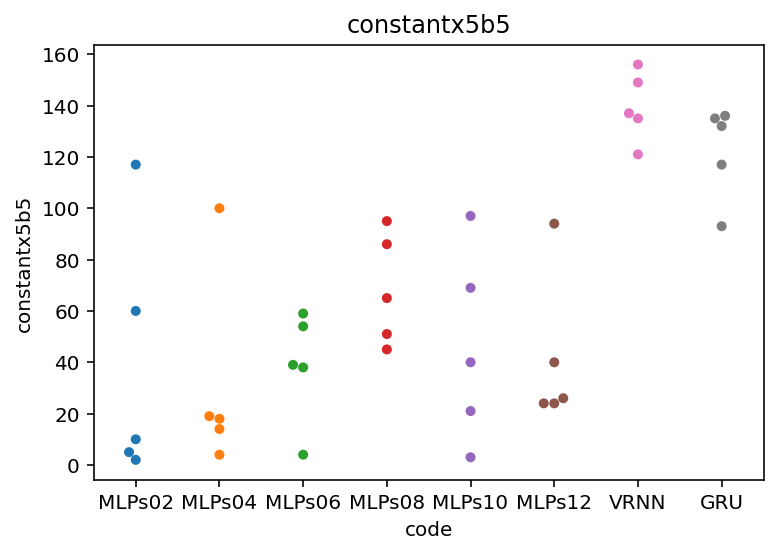

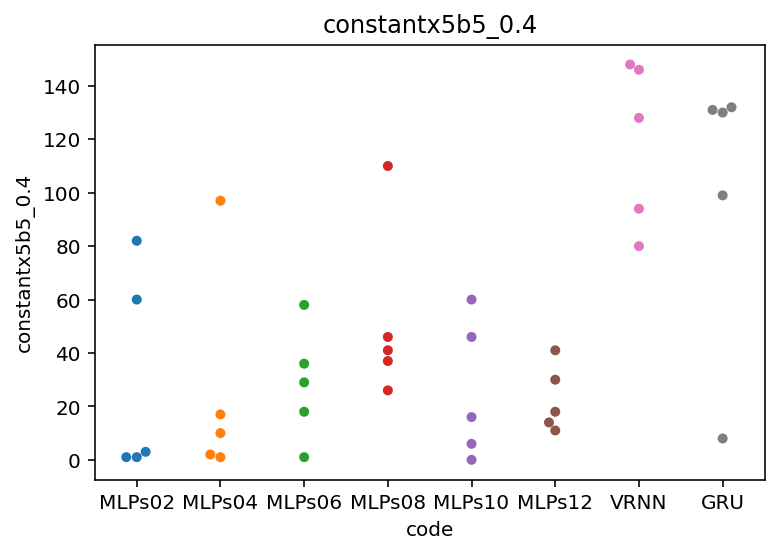

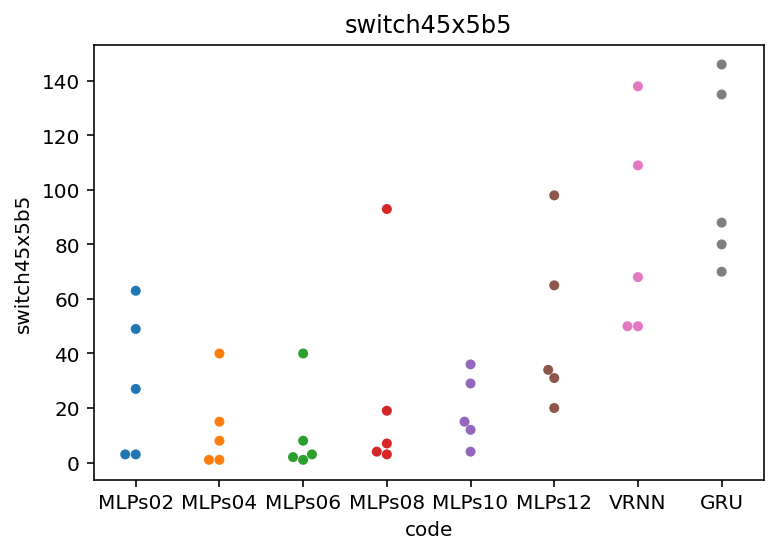

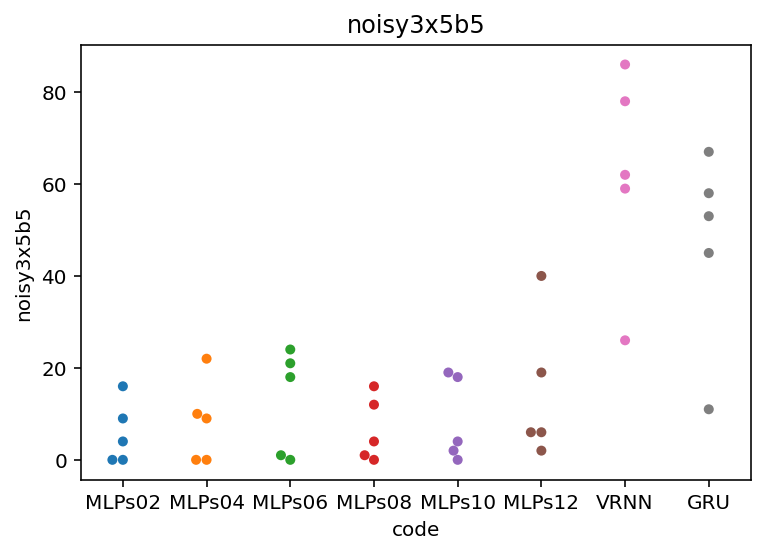

In [18]:
# success_counts_df = pivot_df[['constantx5b5', 'noisy3x5b5', 'switch45x5b5','code', 'model_dir']].pivot(index) # .groupby(['code', 'model_dir']).sum().melt()
# # success_counts_df['label'] = success_counts_df['dataset'].map({})
# g = sns.FacetGrid(success_counts_df, col='dataset', size=2.75, aspect=1.0, hue='dataset')
# # g.map( sns.stripplot, 'model_code', 'n_success_episodes', dodge=True)
# g.map( sns.swarmplot, 'model_code', 'n_success_episodes', dodge=True)
# g.fig.subplots_adjust(wspace=0.1)
# # g.set(ylim=(0,240))
# g.set(ylim=(0,200))
# # g.tight_layout() # incompatible with subplots_adjust
# g.axes.flat[0].set_ylabel("Successful episodes [#]")
# success_counts_df/
# sns.swarmplot
for col in ['constantx5b5', 'constantx5b5_0.4', 'switch45x5b5', 'noisy3x5b5',]:
    sns.swarmplot(x='code', y=col, data=selected,
         order=['MLPs02', 'MLPs04', 'MLPs06', 'MLPs08', 'MLPs10', 'MLPs12', 'VRNN', 'GRU'])
    plt.title(col)
    plt.show()
